# Phân cụm thị trường cầu thủ bóng đá

## Data and Setup
___

### ** Import thư viện **

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from sklearn.datasets import make_classification

### ** Đọc dữ liệu từ các file csv và lưu vào các DataFrame **

In [29]:
players = pd.read_csv('./clean_data/players.csv')
countries = pd.read_csv('./clean_data/countries.csv')
clubs = pd.read_csv('./clean_data/clubs.csv')

### ** Hợp hệ số "points" của quốc gia tổ chức giải đấu vào bảng players để khảo sát"

In [30]:
players = players.merge(countries[['name', 'points']], how='left', left_on='country', right_on='name')
players = players.rename(columns={'points': 'point_of_tournament', 'name_x': 'name'})
players = players.drop('name_y', axis=1)

### ** Khởi tạo một số biến dữ liệu cầu thủ quan trọng **

In [31]:
players_market_value = players['market_value']

mean_market_value = np.mean(players_market_value)
median_market_value = np.median(players_market_value)
std_market_value = np.std(players_market_value)
max_market_value = np.max(players_market_value)
min_market_value = np.min(players_market_value)
percentile25th_market_value = np.percentile(players_market_value, 25)
percentile50th_market_value = np.percentile(players_market_value, 50)
percentile80th_market_value = np.percentile(players_market_value, 80)
percentile95th_market_value = np.percentile(players_market_value, 95)


players_not_G = players[players['position'] != 'G']
players_F = players[players['position'] == 'F']
players_M = players[players['position'] == 'M']
players_D = players[players['position'] == 'D']
players_G = players[players['position'] == 'G']

** Như đã khảo sát dữ liệu đơn biết 'market_value' trước đó, ta thấy thị trường cầu thủ có thể phân thành 2 nhóm chính là nhóm dưới mức giá trị trung bình (chiếm mức trung vị 80%) và nhóm trên mức trung bình và xét theo từng vị trí để tiện cho việc khảo sát. **

In [32]:
players_greater_mean = players[players['market_value'] > mean_market_value]
players_less_mean = players[players['market_value'] < mean_market_value]

players_F_greater_mean = players_F[players_F['market_value'] > mean_market_value]
players_F_less_mean = players_F[players_F['market_value'] < mean_market_value]

players_M_greater_mean = players_M[players_M['market_value'] > mean_market_value]
players_M_less_mean = players_M[players_M['market_value'] < mean_market_value]

players_D_greater_mean = players_D[players_D['market_value'] > mean_market_value]
players_D_less_mean = players_D[players_D['market_value'] < mean_market_value]

players_G_greater_mean = players_G[players_G['market_value'] > mean_market_value]
players_G_less_mean = players_G[players_G['market_value'] < mean_market_value]

players_not_G_greater_mean = players_not_G[players_not_G['market_value'] > mean_market_value]
players_not_G_less_mean = players_not_G[players_not_G['market_value'] < mean_market_value]

## Khảo sát sự tương quan giữa các biến dữ liệu của cầu thủ
___

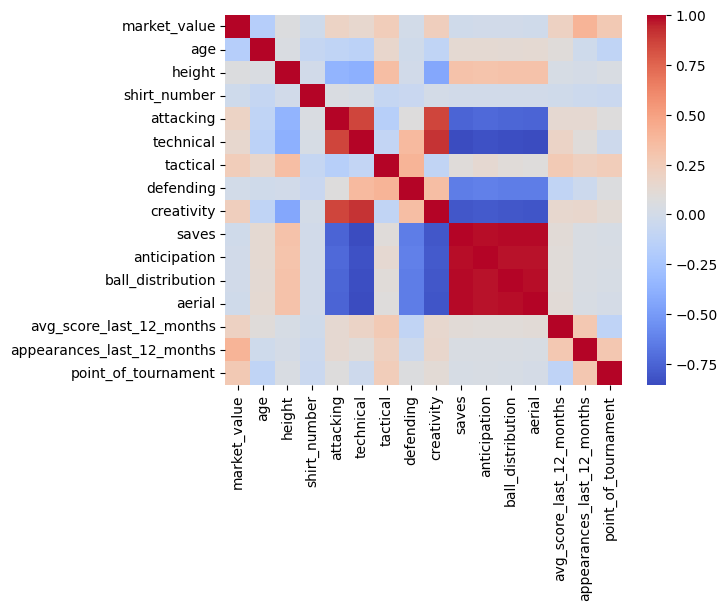

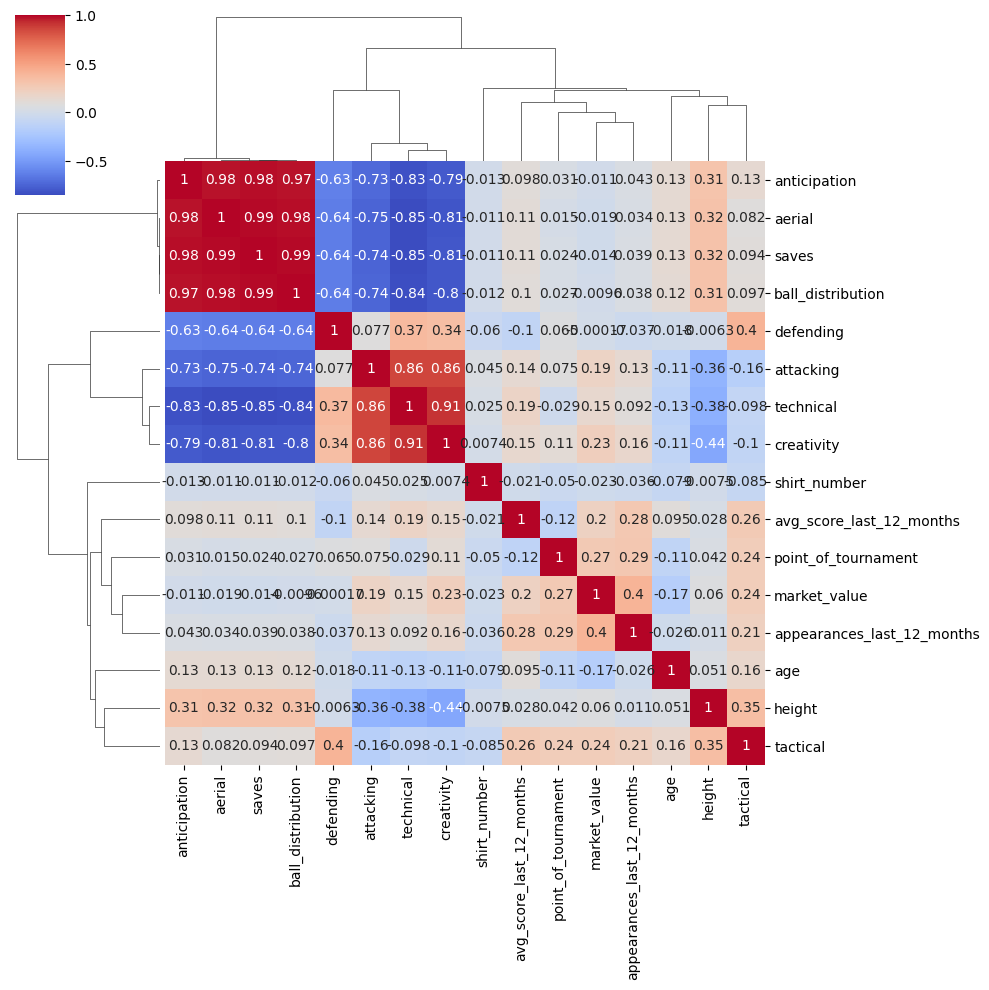

In [33]:
numeric_columns = players.select_dtypes(include=['float64', 'int64', 'int32', 'bool']).columns
sns.heatmap(players[numeric_columns].corr(),cmap='coolwarm')

sns.clustermap(players[numeric_columns].corr(),cmap='coolwarm',annot=True)

# sns.clustermap(players_F[numeric_columns].drop(['saves', 'anticipation', 'ball_distribution', 'aerial'], axis=1).corr(),cmap='coolwarm',annot=True)
# sns.clustermap(players_M[numeric_columns].drop(['saves', 'anticipation', 'ball_distribution', 'aerial'], axis=1).corr(),cmap='coolwarm',annot=True)
# sns.clustermap(players_D[numeric_columns].drop(['saves', 'anticipation', 'ball_distribution', 'aerial'], axis=1).corr(),cmap='coolwarm',annot=True)
# sns.clustermap(players_G[numeric_columns].drop(['attacking', 'technical', 'defending', 'creativity'], axis=1).corr(),cmap='coolwarm',annot=True)

``` Nhận xét```
- Dựa vào Clustermap, có thể nhận thấy được một số bộ biến dữ liệu có tính tương quan và có khả năng mang tính chất cụm.
    + Technical, Creativity, Attacking có tính tương quan cao
    + Technical, Creativity, Attacking và Market_value có tính tương quan thấp
    + Saves, Ball_distribution, Tactical, Aerial, Anticipation có tính tương quan cao
    + Defending, Tactical có tính tương quan thấp
    + Market_value, appearances_last_12_months, avg_score_last_12_months, point_of_tournament có tính tương quan thấp
- Ngoài ra có một số cặp biến cũng có tính tương quan cao có thể không được trực quan dựa trên clustermap.

### ** Khảo sát các thông số thi đấu tùy theo vị trí đá **

#### *** Vị trí Tiền đạo (F) ***

Text(0, 0.5, 'Rating')

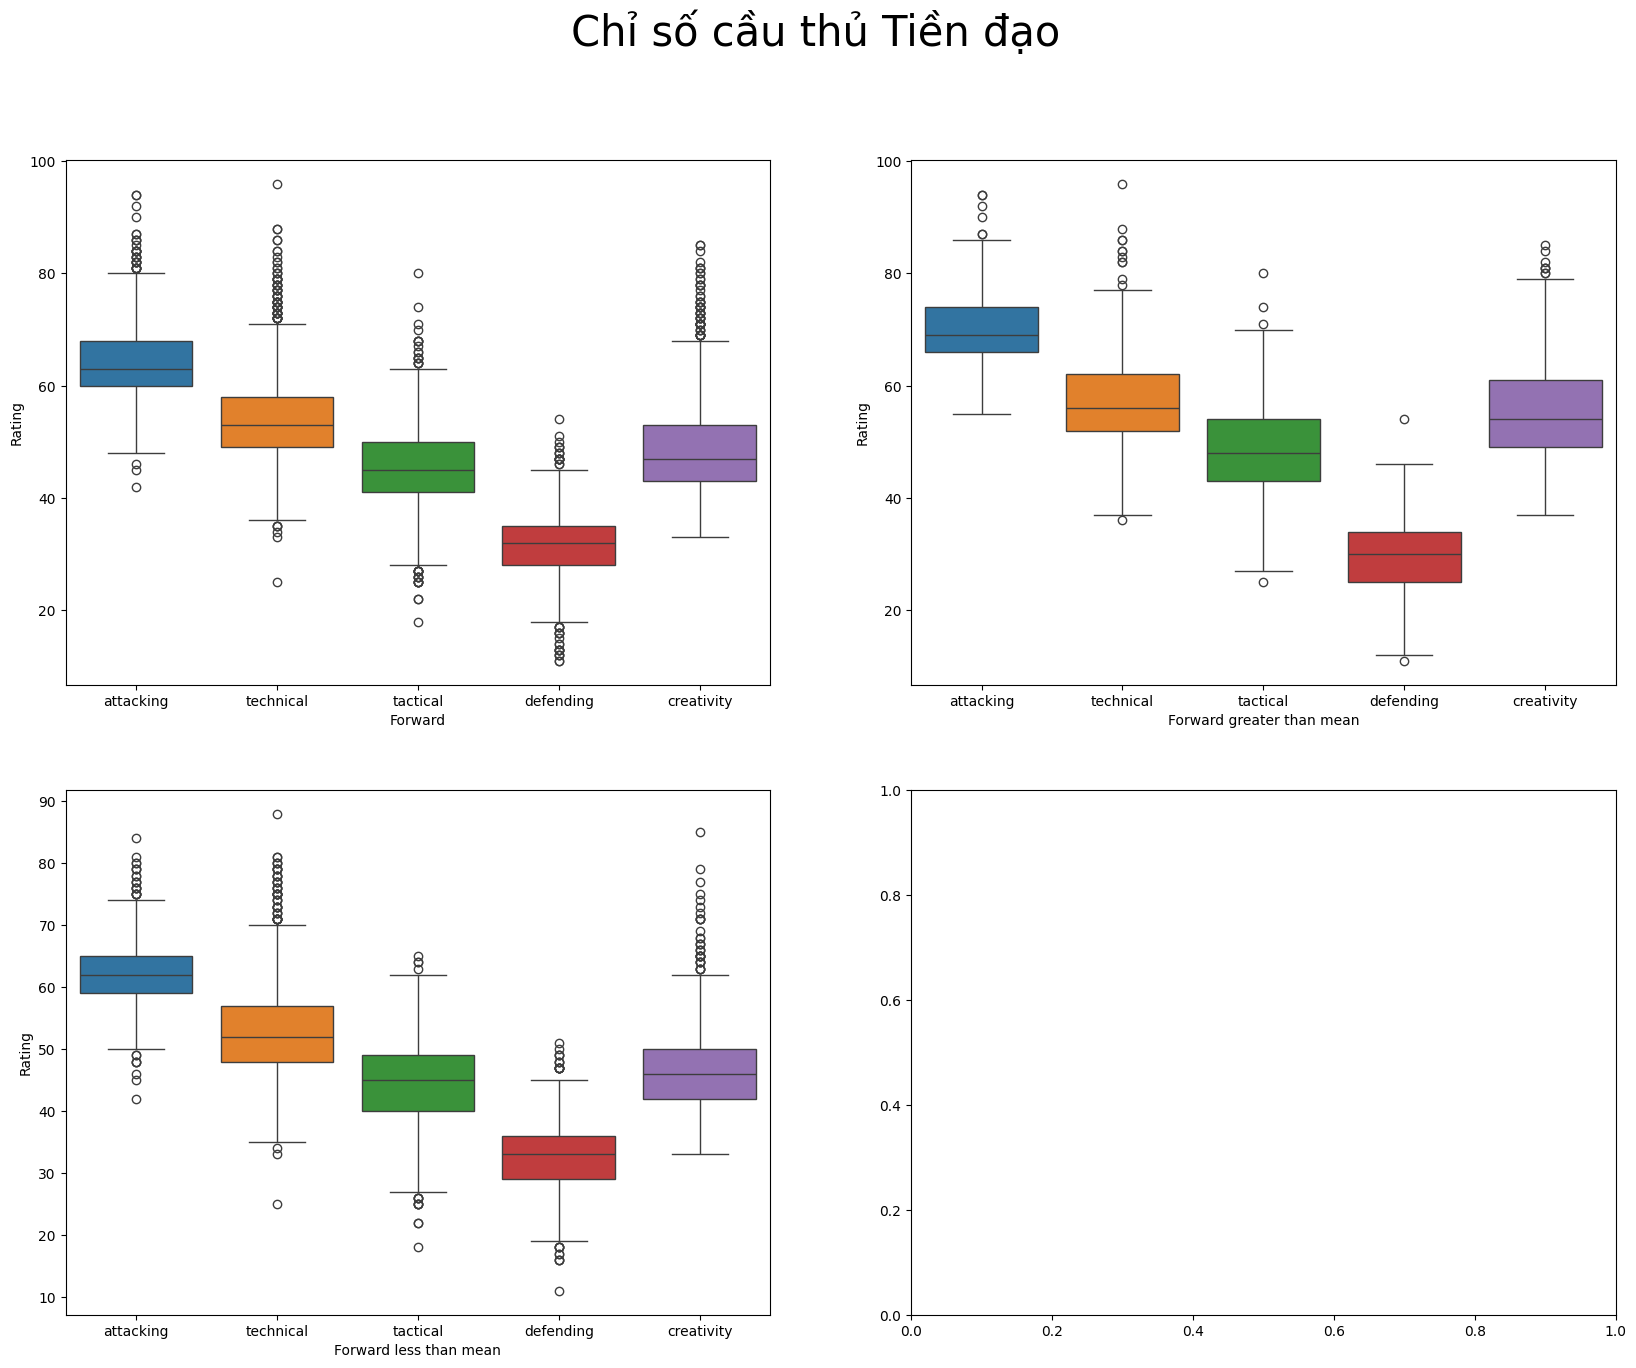

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Chỉ số cầu thủ Tiền đạo', fontsize=30)
sns.boxplot(ax=axes[0, 0], data=players_F[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])
sns.boxplot(ax=axes[0, 1], data=players_F_greater_mean[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])
sns.boxplot(ax=axes[1, 0], data=players_F_less_mean[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])

axes[0, 0].set_xlabel('Forward')
axes[0, 1].set_xlabel('Forward greater than mean')
axes[1, 0].set_xlabel('Forward less than mean')

axes[0, 0].set_ylabel('Rating')
axes[0, 1].set_ylabel('Rating')
axes[1, 0].set_ylabel('Rating')

``` Nhận xét```
- Các chỉ số của tiền đạo ở mọi mức giá có mối tương quan giống nhau
- Với các tiền đạo cao hơn giá trị mean (của giá trị thị trường), các chỉ số attacking, technical, tactical, creativity đều cao hơn các tiền đạo thấp hơn giá trị mean.

#### *** Vị trí Tiền vệ (M) ***

Text(0, 0.5, 'Rating')

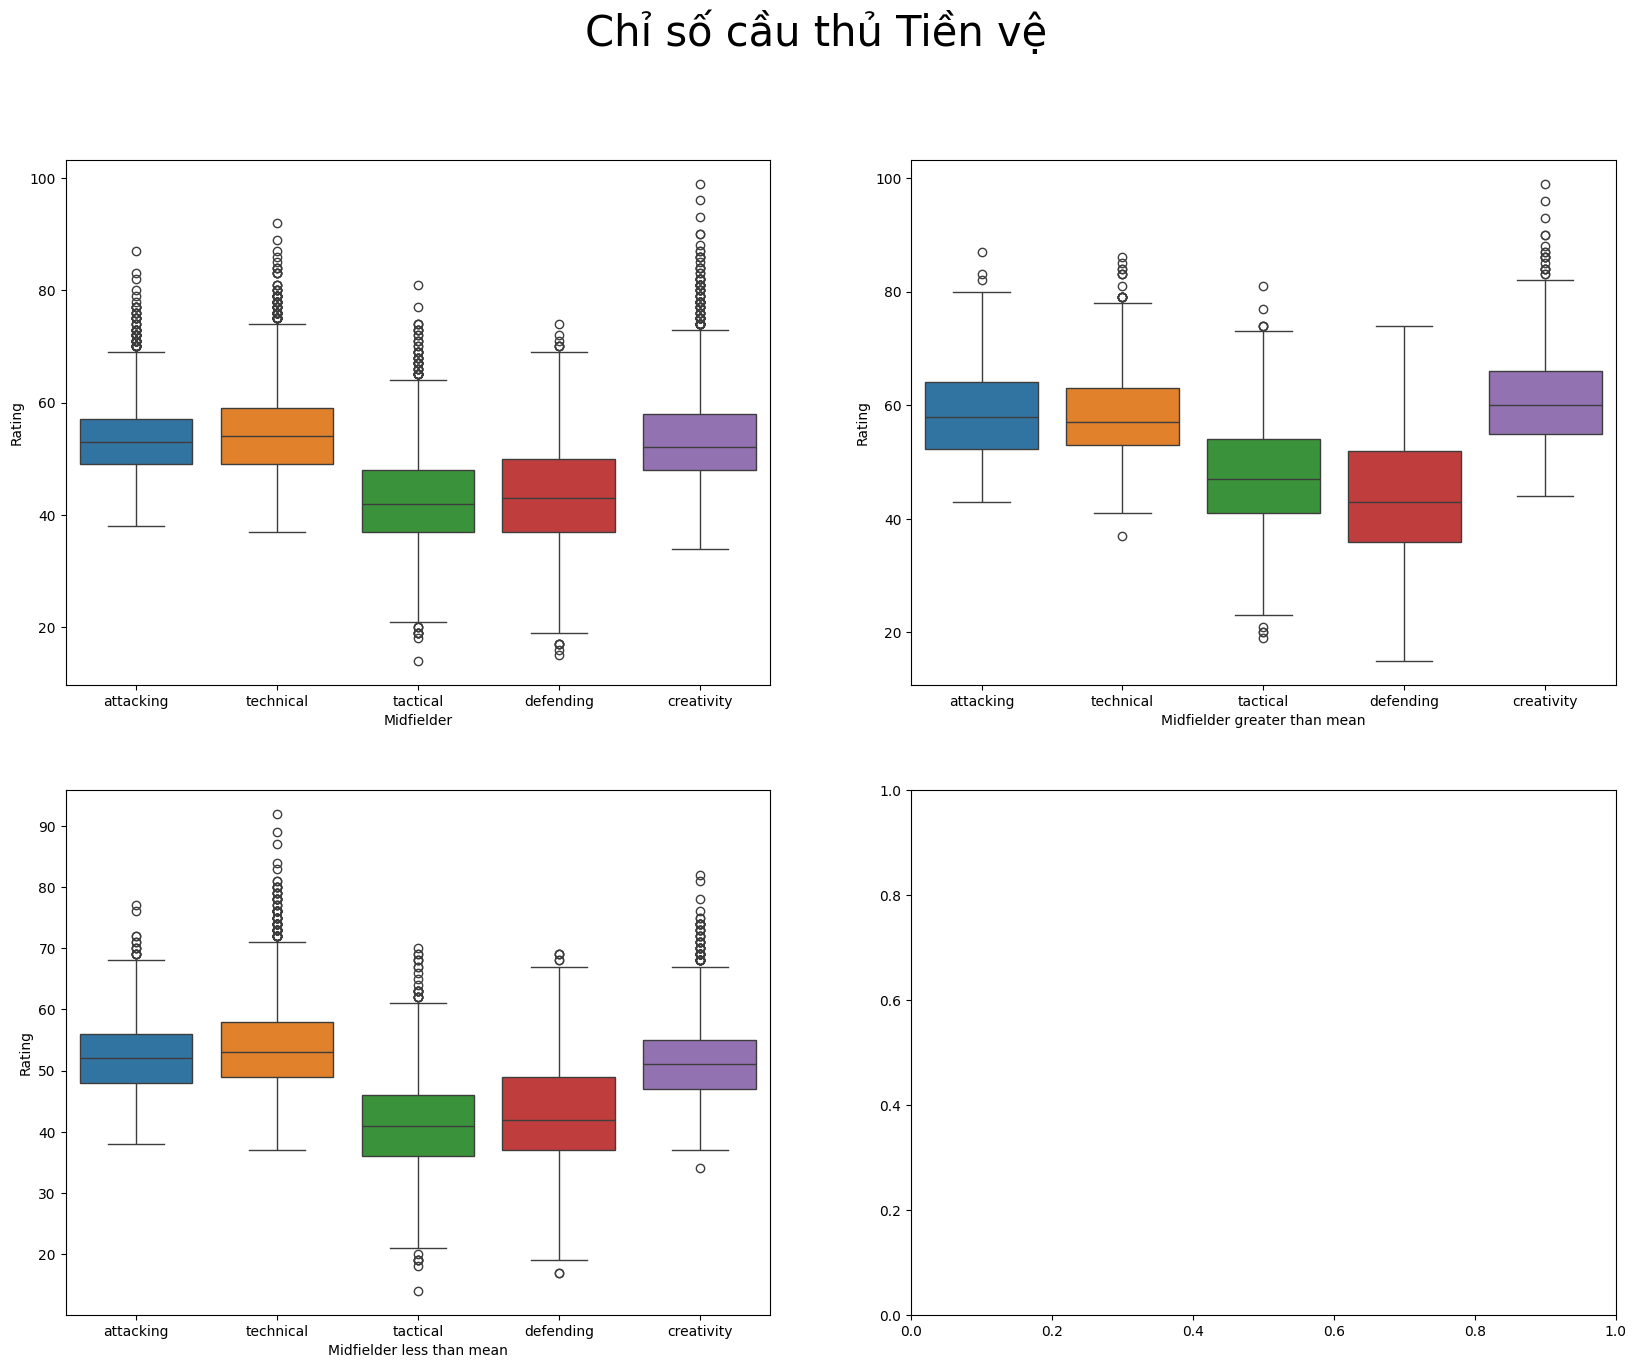

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Chỉ số cầu thủ Tiền vệ', fontsize=30)
sns.boxplot(ax=axes[0, 0], data=players_M[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])
sns.boxplot(ax=axes[0, 1], data=players_M_greater_mean[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])
sns.boxplot(ax=axes[1, 0], data=players_M_less_mean[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])

axes[0, 0].set_xlabel('Midfielder')
axes[0, 1].set_xlabel('Midfielder greater than mean')
axes[1, 0].set_xlabel('Midfielder less than mean')

axes[0, 0].set_ylabel('Rating')
axes[0, 1].set_ylabel('Rating')
axes[1, 0].set_ylabel('Rating')

``` Nhận xét```
-Các chỉ số giữa các tiền vệ cao với mức giá trị cao, và giá trị thấp hơn giá trị trung bình nhìn chung không khác nhau nhiều
- Với các tiền vệ có giá trị trên mức trung bình, các chỉ số đều cao hơn các tiền vệ thấp hơn mức giá trị trung bình

#### *** Vị trí Hậu vệ (D) ***

Text(0, 0.5, 'Rating')

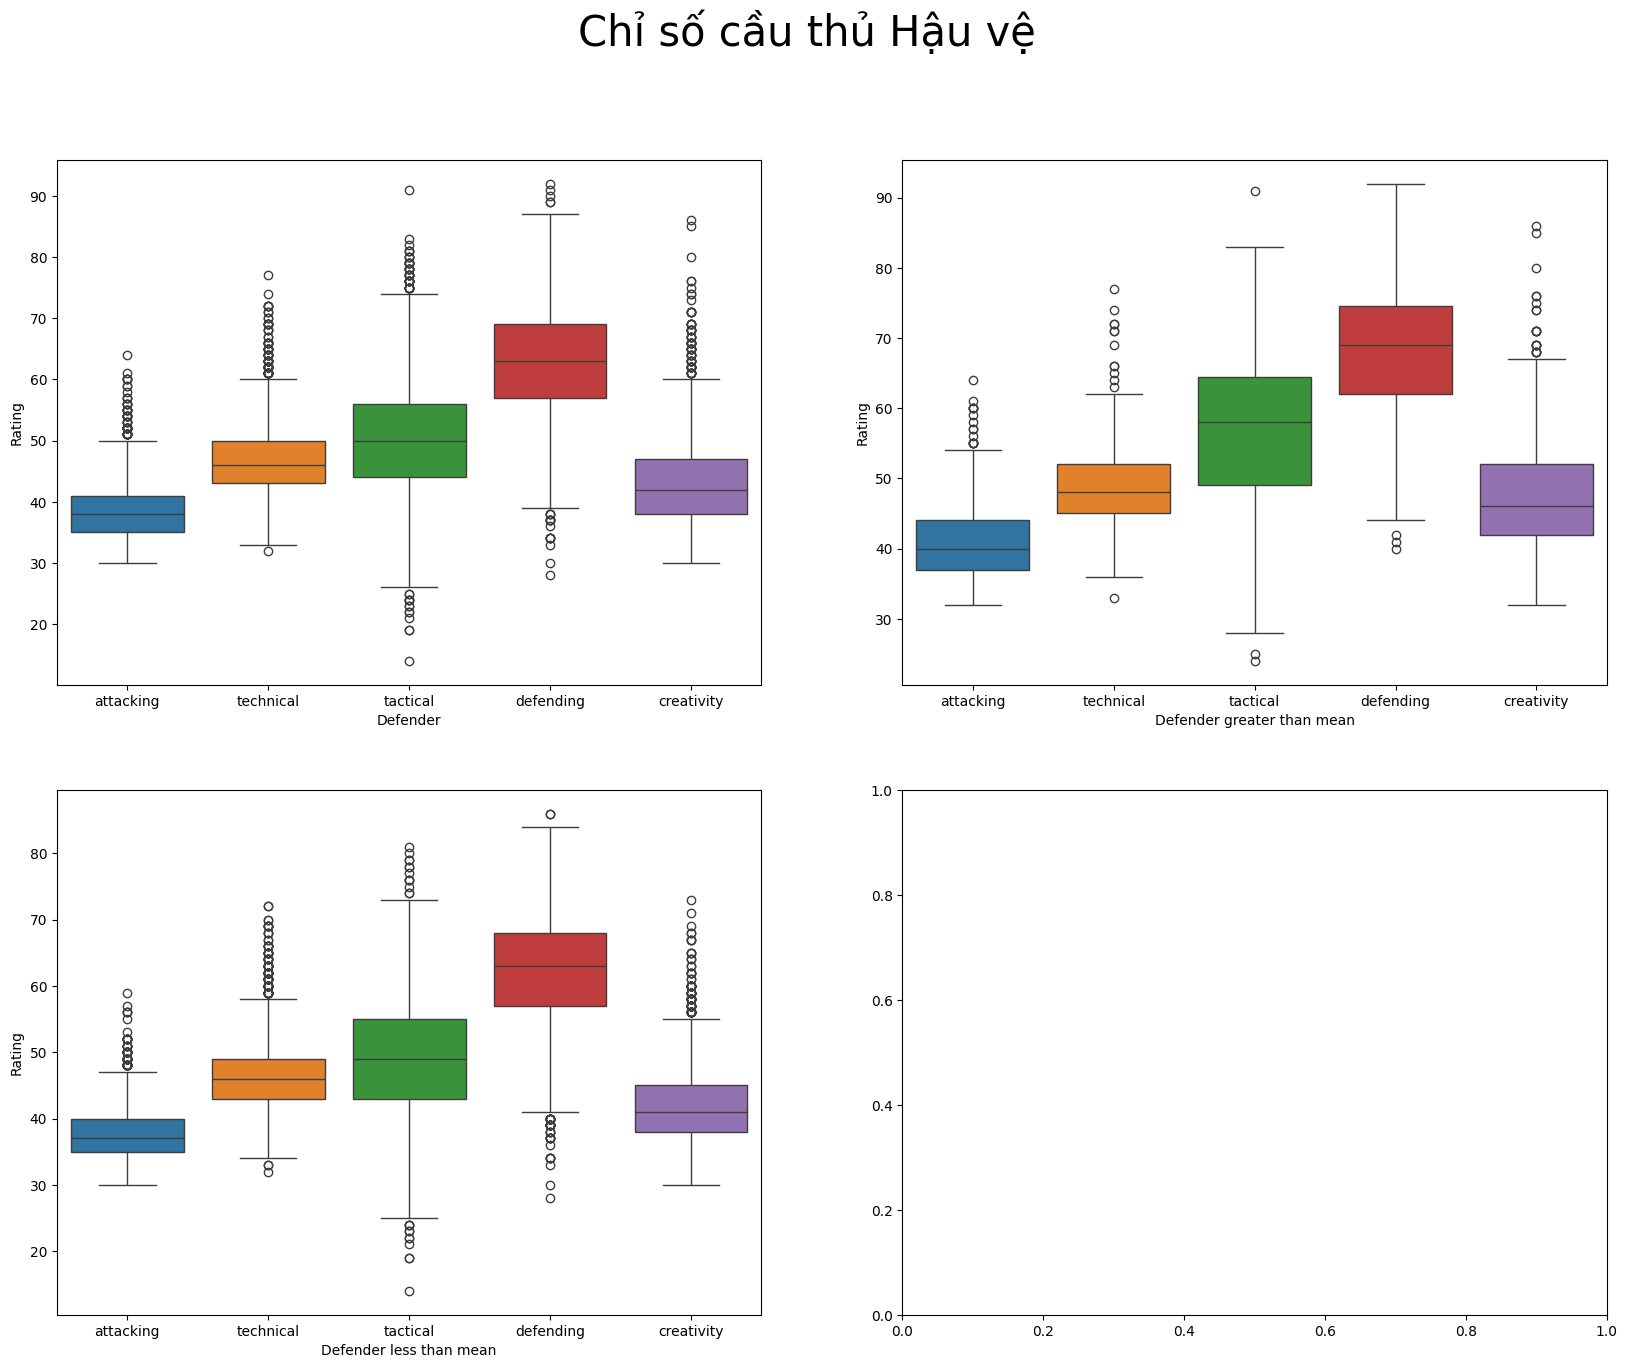

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Chỉ số cầu thủ Hậu vệ', fontsize=30)
sns.boxplot(ax=axes[0, 0], data=players_D[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])
sns.boxplot(ax=axes[0, 1], data=players_D_greater_mean[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])
sns.boxplot(ax=axes[1, 0], data=players_D_less_mean[['attacking' , 'technical' , 'tactical' , 'defending' , 'creativity']])

axes[0, 0].set_xlabel('Defender')
axes[0, 1].set_xlabel('Defender greater than mean')
axes[1, 0].set_xlabel('Defender less than mean')

axes[0, 0].set_ylabel('Rating')
axes[0, 1].set_ylabel('Rating')
axes[1, 0].set_ylabel('Rating')

``` Nhận xét```
- Với các hậu vệ cao hơn giá trị mean, các chỉ số đều cao hơn các hậu vệ thấp hơn giá trị mean

#### *** Vị trí thủ môn (G) ***

Text(0, 0.5, 'Rating')

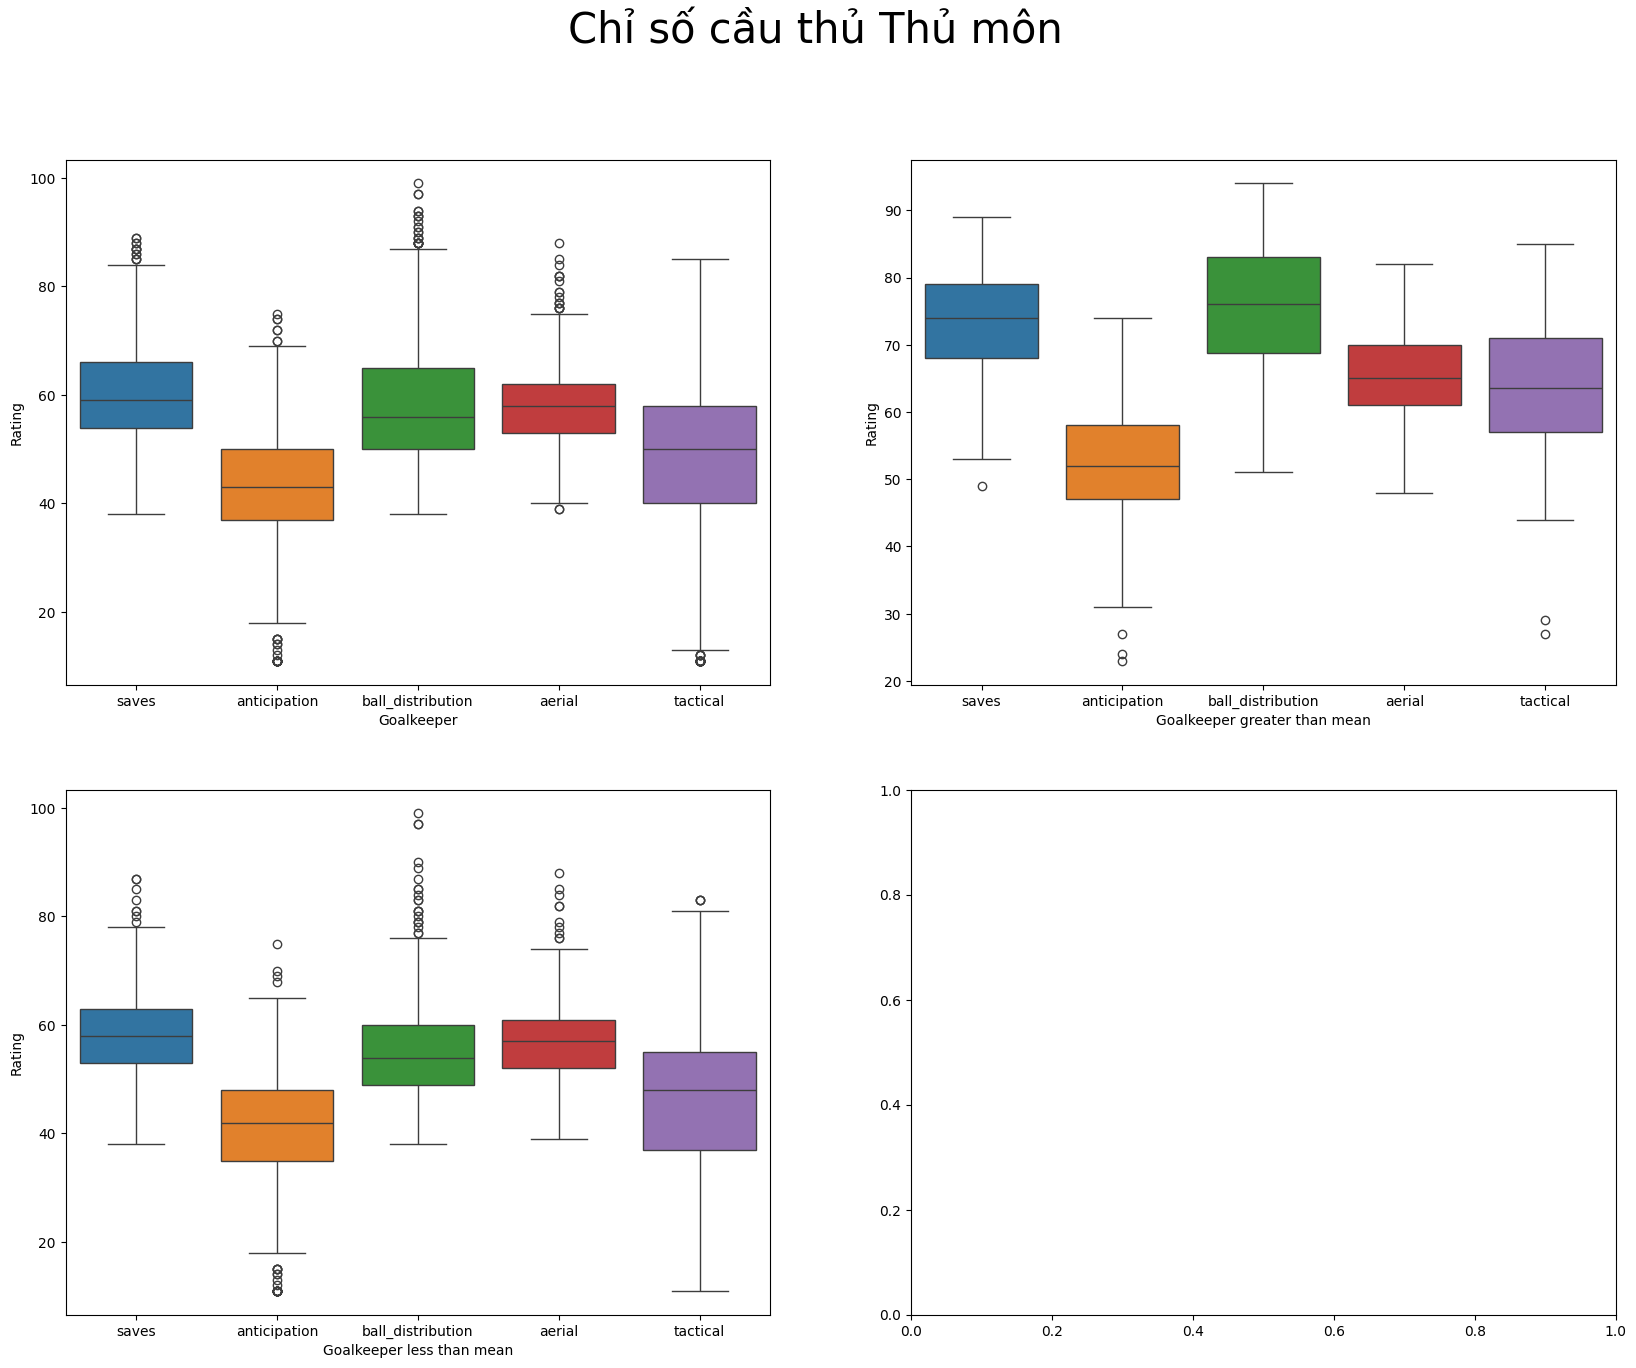

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Chỉ số cầu thủ Thủ môn', fontsize=30)
sns.boxplot(ax=axes[0, 0], data=players_G[['saves' , 'anticipation' , 'ball_distribution' , 'aerial' , 'tactical']])
sns.boxplot(ax=axes[0, 1], data=players_G_greater_mean[['saves' , 'anticipation' , 'ball_distribution' , 'aerial' , 'tactical']])
sns.boxplot(ax=axes[1, 0], data=players_G_less_mean[['saves' , 'anticipation' , 'ball_distribution' , 'aerial' , 'tactical']])

axes[0, 0].set_xlabel('Goalkeeper')
axes[0, 1].set_xlabel('Goalkeeper greater than mean')
axes[1, 0].set_xlabel('Goalkeeper less than mean')

axes[0, 0].set_ylabel('Rating')
axes[0, 1].set_ylabel('Rating')
axes[1, 0].set_ylabel('Rating')

``` Nhận xét```
- Với các thủ môn cao hơn giá trị mean, các chỉ số đều cao hơn các thủ môn thấp hơn giá trị mean

``` Kết luận```
- Ở các vị trí thì với các mức giá khác nhau thì tính chất, mối tương quan của các chỉ số vẫn giống nhau

### ** So sánh các chỉ số của vị trí Tiền đạo(F), Tiền vệ(M), Hậu vệ(D) **

Text(0.5, 0.98, 'Compare Player Attributes by Position')

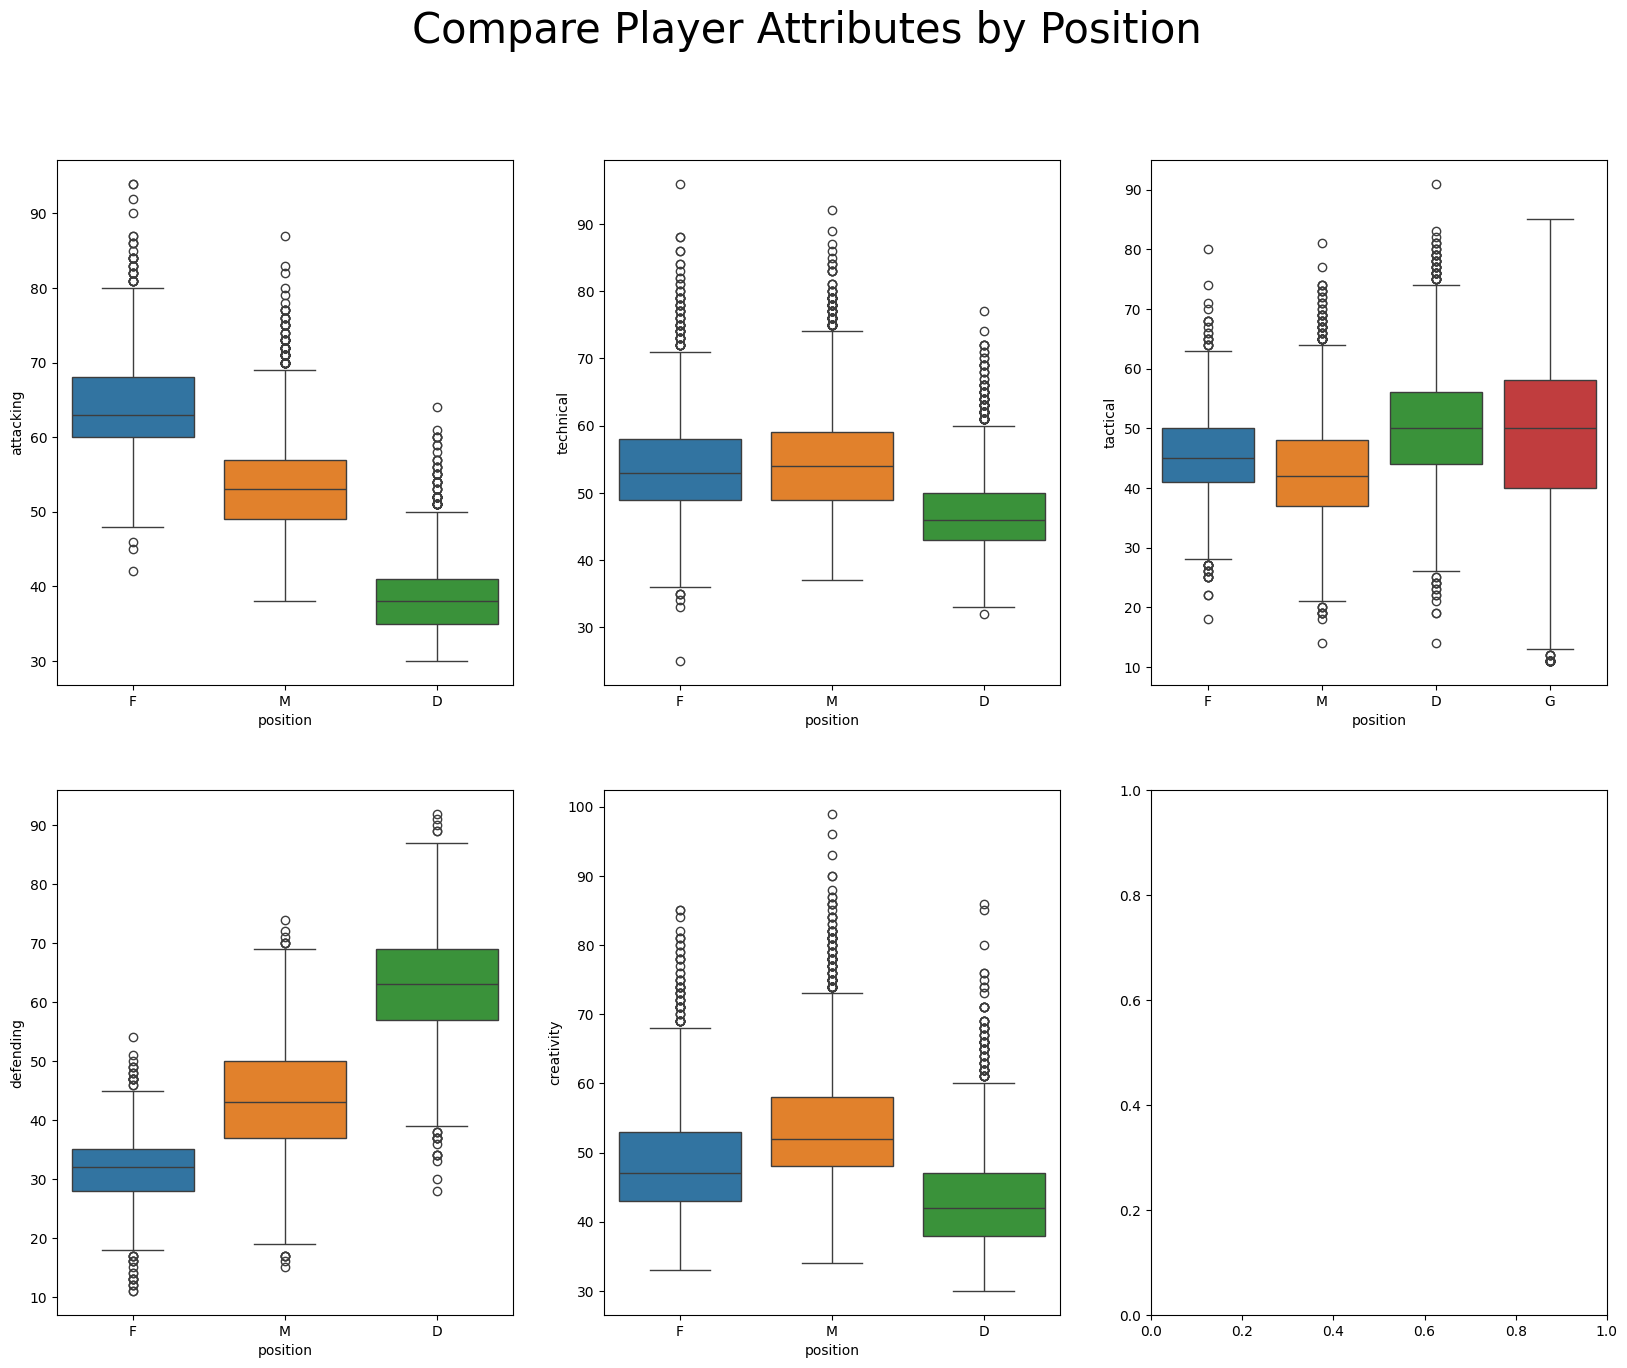

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))

fig.suptitle('Compare Player Attributes by Position')
sns.boxplot(ax=axes[0, 0], x='position', y='attacking', hue='position', data=players_not_G)
sns.boxplot(ax=axes[0, 1], x='position', y='technical', hue='position', data=players_not_G)
sns.boxplot(ax=axes[0, 2], x='position', y='tactical', hue='position', data=players)
sns.boxplot(ax=axes[1, 0], x='position', y='defending', hue='position', data=players_not_G)
sns.boxplot(ax=axes[1, 1], x='position', y='creativity', hue='position', data=players_not_G)


fig.suptitle('Compare Player Attributes by Position', fontsize=30) 

```Nhận xét```
- Các cầu thủ ở vị trí Tiền đạo, Tiền vệ có các chỉ số cao tập trung ở chỉ số Attacking, Technical và Creativity. Trong đó Tiền đạo tập trung hơn ở Attacking, Tiền vệ tập trung hơn ở Creativity
- Các cầu thủ ở vị trí Hậu về có chỉ số tập trung cao ở chỉ số Defending, Tactical và Creativity
- Chỉ số Tactical phân chia đồng đều giữa các ví trị. Tuy nhiên, có giá trị cao hơn đối với vị trí Thủ môn (G) và Hậu vệ (D)

## Phân tích một số mối tương quan giữa các biến
___

### ** Mối quan hệ giữa Age và Market value **

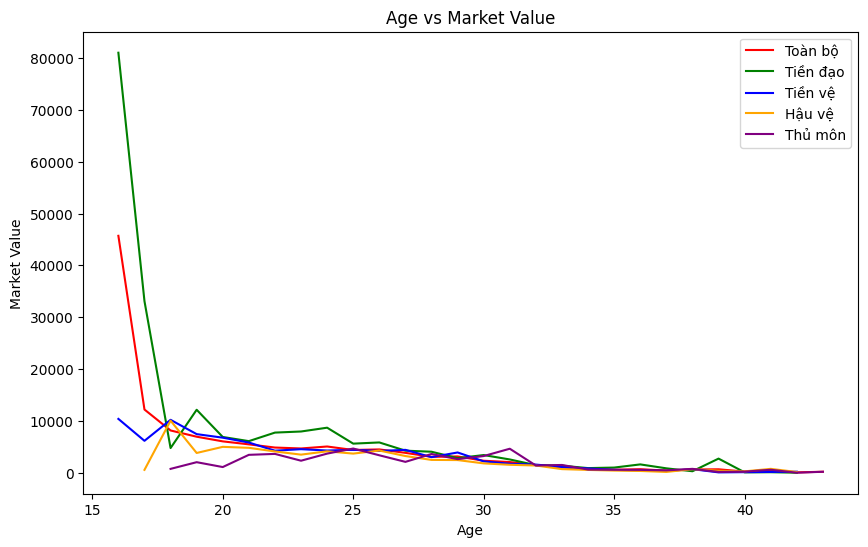

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='market_value', data=players, color='red', errorbar=None, label='Toàn bộ')
sns.lineplot(x='age', y='market_value', data=players_F, color='green', errorbar=None, label='Tiền đạo')
sns.lineplot(x='age', y='market_value', data=players_M, color='blue', errorbar=None, label='Tiền vệ')
sns.lineplot(x='age', y='market_value', data=players_D, color='orange', errorbar=None, label='Hậu vệ')
sns.lineplot(x='age', y='market_value', data=players_G, color='purple', errorbar=None, label='Thủ môn')
plt.title('Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value')
plt.legend()
plt.show()

```Nhận xét ```
- Giá trị thị trường của các cầu thủ tiền đạo thường cao hơn so với các vị trí khác ở mọi độ tuổi, đặc biệt là ở các độ tuổi trẻ. 
- Giá trị thị trường của thủ môn thường ổn định ở mức thấp hơn so với các vị trí khác, với sự biến động ít hơn theo độ tuổi. 
- Các vị trí khác như tiền vệ và hậu vệ có sự biến động về giá trị thị trường tương đối đồng đều theo độ tuổi, nhưng thường ổn định ở mức trung bình.

** Mối quan hệ giữa Position và Market value **

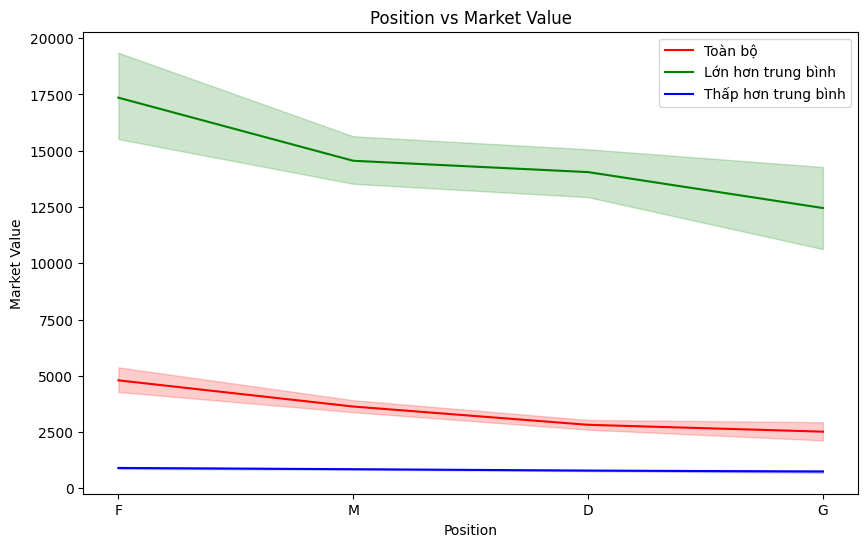

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='position', y='market_value', data=players, color='red', label='Toàn bộ')
sns.lineplot(x='position', y='market_value', data=players_greater_mean, color='green', label='Lớn hơn trung bình')
sns.lineplot(x='position', y='market_value', data=players_less_mean, color='blue', label='Thấp hơn trung bình')
plt.title('Position vs Market Value')
plt.xlabel('Position')
plt.ylabel('Market Value')
plt.legend()
plt.show()

```Nhận xét ```
- Giá trị thị trường của các cầu ở vị trí Tiền đạo (F) có giá trị thị trường cao vượt trội so với các vị trí khác. 
- Giá trị thị trường của thủ môn (G) thấp nhất trong các vị trí. 
- Giá trị thị trường của Tiền vệ (M) và Hậu vệ (D) tương đối cao và không có sự chênh lệch lớn.

### ** Mối quan hệ giữa Age và Position **

<Axes: xlabel='position', ylabel='age'>

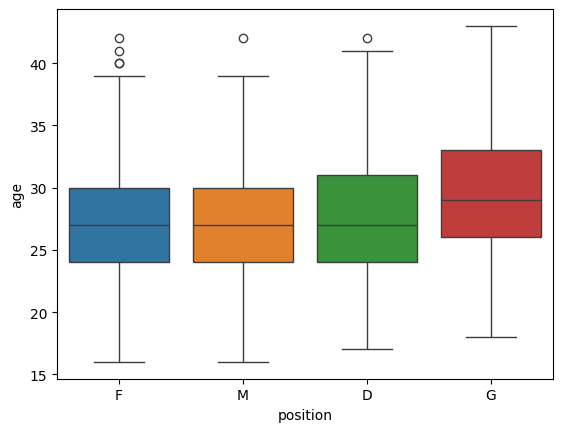

In [41]:
sns.boxplot(x='position', y='age', hue='position', data=players)

``` Nhận xét  ```
- Các cầu thủ có độ tuổi từ khoảng 15 đến 45
- Các vị trí Tiền đạo, Tiền vệ, Hậu vệ: đây là các vị trí quan trọng trong đội bóng nên các cầu thủ có độ tuổi trung bình khá trẻ từ 24-30 tuổi
- Đối với vị trí thủ môn thì không yêu cầu nhiều về tuổi như các vị trí khác, nên có độ tuổi tập trung khá lớn khoảng 26-33

### ** Mối quan hệ giữa Height và Position **

<Axes: xlabel='position', ylabel='height'>

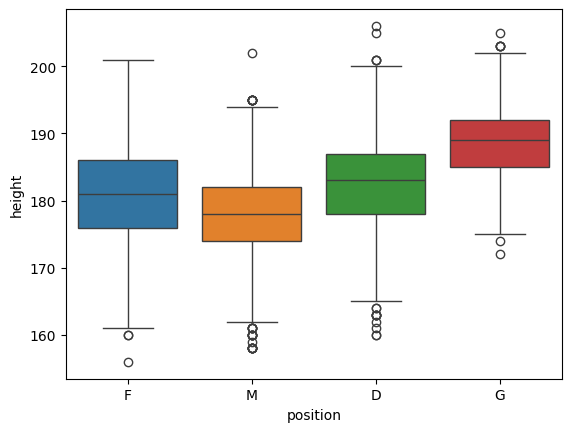

In [42]:
sns.boxplot(x='position', y='height', hue='position', data=players)

``` Nhận xét ``` :
- Các cầu thủ có chiều cao trung bình trên 175
- Thủ môn có chiều cao chênh lệch lớn hơn với các vị trí còn lại, vì các thủ môn cần khả năng cản phá bóng trên cao và tranh chấp bóng
- Tiền đạo và Hậu vệ có yêu cầu về chiều cao ở mức tương đối cao, cao hơn so với vị trí Tiền vệ

### ** Mối quan hệ giữa Tactical và Position **

<Axes: xlabel='position', ylabel='tactical'>

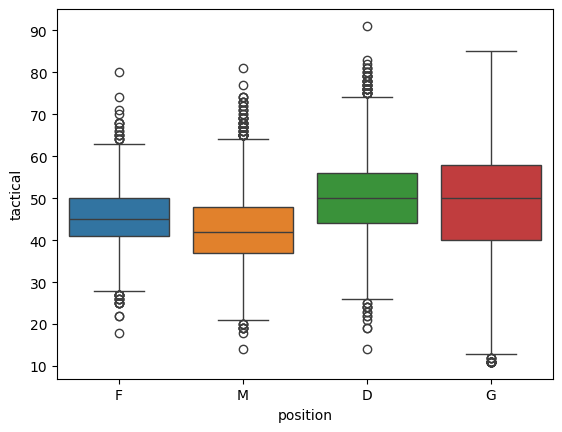

In [43]:
sns.boxplot(x='position', y='tactical', hue='position', data=players)

``` Nhận xét ```
- Yêu cầu về khả năng chiến thuật của các vị trí ở mức trung bình tương đối giống nhau
- Thủ môn và Hậu vệ yêu cầu có khả năng chiến thuật cao hơn các vị trí còn lại

## ** Trực quan hóa tính chất cụm của các chỉ số **
___

### *** Khảo sát một số cụm phụ thuộc 2 biến ***

In [44]:
px.scatter(players, x='attacking', y='technical', color='position', opacity=0.7)

```Nhận xét```
- Hai chỉ số Attacking và Technical tăng tuyến tính với nhau ở các vị trí Tiền đạo, Tiền vệ, Hậu vệ

In [45]:
px.scatter(players, x='attacking', y='creativity', color='position', opacity=0.7)

```Nhận xét```
- Hai chỉ số Attacking và Creativity tăng tuyến tính với nhau ở các vị trí Tiền đạo, Tiền vệ, Hậu vệ

In [46]:
px.scatter(players, x='tactical', y='defending', color='position', opacity=0.7)

```Nhận xét```
- Hai chỉ số Tactical và Defending tăng tuyến tính với nhau ở các vị trí Tiền đạo, Tiền vệ, Hậu vệ.
- Vị trí Thủ môn bị ảnh hưởng bởi tactical, nhưng không có chỉ số defending

### *** Khảo sát cụm phụ thuộc vào technical, creativity, attacking ***

In [47]:
px.scatter(players, x='technical', y='creativity', color='attacking')

```Nhận xét```
- Có 2 cụm
    + Cụm 1: Cả 3 chỉ số đều thấp với khoảng chỉ số technical < 55, creativity < 65, attacking < 55
    + Cụm 2: Cả 3 chỉ số đều cao với khoảng chỉ số technical > 55, creativity > 65, attacking > 55

### *** Khảo sát quan hệ của bộ 3 chỉ số technical, creativity, attacking với các biến khác ***

In [48]:
px.scatter_3d(players, x='technical', y='creativity', z='attacking', color='position')

```Nhận xét```
- Có sự phân cụm rõ ràng theo 3 chỉ số Attacking, Technical, Creativity
- Các cụm có Technical và Creativity tăng tuyến tính như nhau. Tuy nhiên có khác biệt về chỉ số Attacking

In [49]:
px.scatter_3d(players, x='technical', y='creativity', z='market_value', color='attacking')

```Nhận xét```
- Có sự phân cụm rõ ràng theo 4 chỉ số Attacking, Technical, Creativity, Market_Value
- Nhìn chung, các vị trí có Technical, Attacking và Creativity thấp dẫn đến Market_Value thấp, và ngược lại

In [50]:
px.scatter_3d(players, x='technical', y='creativity', z='attacking', color='avg_score_last_12_months')

```Nhận xét```
- Không có sự ảnh hưởng của 3 chỉ số Attacking, Technical, Creativity đến điểm số trung bình (12 tháng gần nhất)

### ** Khảo sát cụm phụ thuộc vào tactical, defending **

In [51]:
fig = px.scatter_3d(players, x='defending', y='tactical', color='position',z='technical') 
fig.show()
fig = px.scatter_3d(players, x='defending', y='tactical', color='position',z='creativity') 
fig.show()

```Nhận xét```
- Không có tính phân cụm giữa các chỉ số defending, tactical, creativity, technical

### ** Khảo sát cụm phụ thuộc vào saves, ball_distribution **

In [52]:
px.scatter_3d(players_G, x='saves', y='ball_distribution',z='aerial',color='tactical') 

```Nhận xét```
- Có sự phân cụm rõ ràng theo 4 chỉ số Saves, Aerial, Ball_distribution, Tactical
- Có 2 cụm:
    + Cụm 1: các chỉ số Saves, Aerial, Ball_distribution, Tactical đều thấp
    + Cụm 2: các chỉ số Saves, Aerial, Ball_distribution, Tactical đều cao 

In [53]:
px.scatter_3d(players_G, x='saves', y='ball_distribution',z='anticipation',color='tactical') 

```Nhận xét```
- Có sự phân cụm rõ ràng theo 4 chỉ số Saves, Anticipation, Ball_distribution, Tactical
- Có 3 cụm:
    + Cụm 1: các chỉ số Saves, Anticipation, Ball_distribution, Tactical đều thấp
    + Cụm 2: các chỉ số Saves, Aerial, Ball_distribution, Tactical trung bình 
    + Cụm 3: các chỉ số Saves, Aerial, Ball_distribution, Tactical đều cao 

### ** Khảo sát về market_value, avg_score_last_12_months, appearances_last_12_months, point_of_tournament **

In [54]:
fig = px.scatter(players, x='market_value', y='avg_score_last_12_months', color='point_of_tournament')
fig.show()
fig = px.scatter(players, x='market_value', y='appearances_last_12_months', color='point_of_tournament')
fig.show()

```Nhận xét```
- Không có tính phân cụm giữa các chỉ số market_value, avg_score_last_12_months, point_of_tournament, appearances_last_12_months

## Kết luận
___

- Phân chia dữ liệu cầu thủ bóng đá theo các chỉ số ```Technical, Creativity, Attacking``` làm thể hiện rõ các cụm.
- Phân chia dữ liệu Thủ môn (G) theo các chỉ số ```Saves, Ball_distribution, Tactical, Aerial``` hoặc ```Saves, Ball_distribution, Tactical, Anticipation``` làm thể hiện rõ các cụm
- Tuy nhiên, các khoảng giá trị phân bố ít tách biệt nên các cụm được xét có sự chồng chéo.